## 線性回歸

In [30]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)

In [31]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


### 一項式回歸

Populating the interactive namespace from numpy and matplotlib


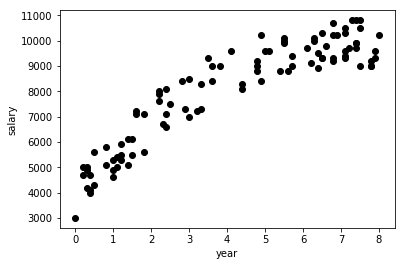

In [32]:
% pylab inline
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
regr.coef_

array([712.59413615])

In [35]:
regr.intercept_

5049.009899813836

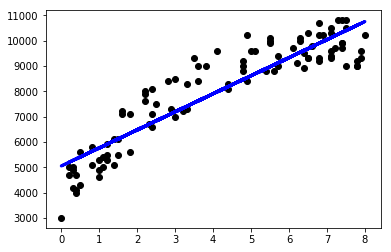

In [36]:
#regr.predict(X)
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()


In [37]:
import numpy as np
regr.predict(np.array([[10], [20]]))

array([12174.95126127, 19300.89262272])

In [38]:
regr.coef_ * 10 + regr.intercept_

array([12174.95126127])

### 二項式回歸

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
#plt.scatter(X, Y, color='black')
#plt.plot(X_, regr.predict(X_), linewidth =   3, color="blue")

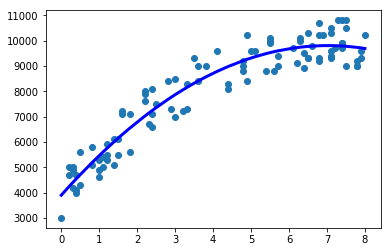

In [54]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X['year'],Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

In [57]:
X3 = poly_reg.fit_transform(np.array([[10],[20]]))

In [59]:
regr.predict(X3)

array([  8738.39978441, -10361.05676572])

### 三項式回歸

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=3)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

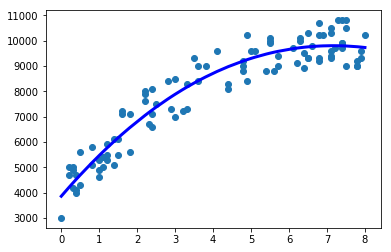

In [61]:
X3  = X.sort_values('year')
X3_ = poly_reg.fit_transform(X3)

plt.scatter(X['year'],Y)
plt.plot(X3, regr.predict(X3_), color = 'blue', linewidth = 3)
plt.show()

In [62]:
N = poly_reg.fit_transform(np.array([[10],[20]]))

In [63]:
regr.predict(N)

array([ 9001.25190157, -3639.8237898 ])